# import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cc=pd.read_csv('C:\\Users\\DELL\\Downloads\\DS- Data Sets\\Simple linear regression\\calories_consumed.csv')
cc.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
#column rename
df=pd.DataFrame(cc)
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:

df.rename(columns = {'Weight gained (grams)':'weightgained','Calories Consumed':'caloriesconsumed'}, inplace = True)
df.rename


<bound method DataFrame.rename of     weightgained  caloriesconsumed
0            108              1500
1            200              2300
2            900              3400
3            200              2200
4            300              2500
5            110              1600
6            128              1400
7             62              1900
8            600              2800
9           1100              3900
10           100              1670
11           150              1900
12           350              2700
13           700              3000>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   weightgained      14 non-null     int64
 1   caloriesconsumed  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


correlation

In [6]:
df.corr

<bound method DataFrame.corr of     weightgained  caloriesconsumed
0            108              1500
1            200              2300
2            900              3400
3            200              2200
4            300              2500
5            110              1600
6            128              1400
7             62              1900
8            600              2800
9           1100              3900
10           100              1670
11           150              1900
12           350              2700
13           700              3000>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weightgained', ylabel='Density'>

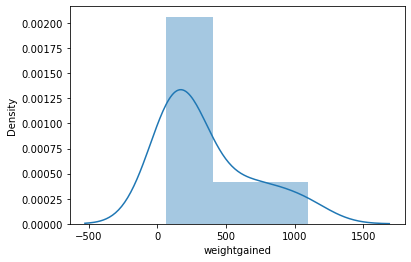

In [7]:
sns.distplot(cc['weightgained'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='caloriesconsumed', ylabel='Density'>

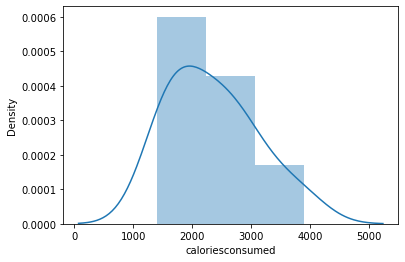

In [8]:
sns.distplot(cc['caloriesconsumed'])

new model and fitting it

In [9]:
import statsmodels.formula.api as smf
model=smf.ols('weightgained~caloriesconsumed',data=df).fit()

<AxesSubplot:xlabel='weightgained', ylabel='caloriesconsumed'>

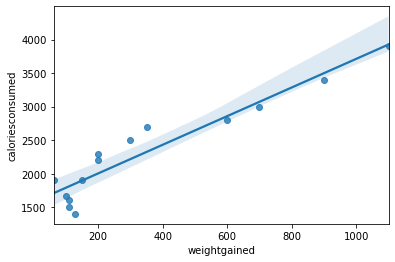

In [10]:
sns.regplot(x='weightgained',y='caloriesconsumed',data=df)

In [11]:
#parameters B0 and B1 
model.params

Intercept          -625.752356
caloriesconsumed      0.420157
dtype: float64

In [12]:
#t and p values
model.tvalues ,'\n', model.pvalues

(Intercept           -6.206449
 caloriesconsumed    10.211269
 dtype: float64,
 '\n',
 Intercept           4.542203e-05
 caloriesconsumed    2.855864e-07
 dtype: float64)

In [13]:
#rsquared and adj rsquared values
model.rsquared,model.rsquared_adj

(0.8967919708530552, 0.8881913017574764)

In [16]:
model.summary()

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weightgained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.86e-07
Time:                        21:37:14   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -625.7524    100.823     -6.206      0.000    -845.427    -406.078
caloriesconsumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""